# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan Sebastian Novoa Ortiz
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [2]:
# --- 1. Importacion de Librerias y Configuracion de Datos ---#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# --- Constantes del Circuito ---#
inductancia_L = 0.98   # Inductancia en Henries (H)
resistencia_R = 0.142  # Resistencia en Ohmios (Ω)

# --- Datos Experimentales ---#
tiempos = np.array([1.00, 1.01, 1.02, 1.03, 1.04]) # en segundos
corrientes = np.array([3.10, 3.12, 3.14, 3.18, 3.24]) # en Amperios

# a. Se construye un DataFrame de Pandas con los datos.
datos_df = pd.DataFrame({
    'Tiempo (s)': tiempos,
    'Corriente (A)': corrientes
})

print("--- Datos del Experimento ---")
print(datos_df)

--- Datos del Experimento ---
   Tiempo (s)  Corriente (A)
0        1.00           3.10
1        1.01           3.12
2        1.02           3.14
3        1.03           3.18
4        1.04           3.24


In [5]:
# --- 2. Calculo de Derivadas: Manual vs. Interpolacion ---#

def calcular_derivada_puntos(y_puntos, x_puntos):
    """
    Calcula la derivada de un conjunto de datos discretos y equiespaciados
    usando formulas de diferencias finitas de tres puntos.

    - Usa la formula hacia adelante para el primer punto.
    - Usa la formula centrada para los puntos intermedios.
    - Usa la formula hacia atras para el ultimo punto.

    Parametros:
    y_puntos (array): Los valores de la funcion (e.g., corriente).
    x_puntos (array): Los valores de la variable independiente (e.g., tiempo).

    Retorna:
    array: Un arreglo con el valor de la derivada en cada punto.
    """
    n = len(y_puntos)
    derivadas = np.zeros(n)

    # Se asume que los puntos estan equiespaciados
    h = x_puntos[1] - x_puntos[0]

    # Formula de 3 puntos hacia adelante para el primer punto (i=0)
    derivadas[0] = (-3*y_puntos[0] + 4*y_puntos[1] - y_puntos[2]) / (2 * h)

    # Formula de 3 puntos centrada para los puntos intermedios
    for i in range(1, n - 1):
        derivadas[i] = (y_puntos[i+1] - y_puntos[i-1]) / (2 * h)

    # Formula de 3 puntos hacia atras para el ultimo punto (i=n-1)
    derivadas[n-1] = (3*y_puntos[n-1] - 4*y_puntos[n-2] + y_puntos[n-3]) / (2 * h)

    return derivadas

# --- Derivada por Diferencias Finitas (Implementacion Manual) ---#
di_dt_numerica = calcular_derivada_puntos(corrientes, tiempos)
datos_df['di/dt Numerica (A/s)'] = di_dt_numerica


# --- Derivada "Exacta" por Interpolacion ---#
# Se crea un modelo de interpolacion para obtener una funcion continua i(t)
spline_corriente = CubicSpline(tiempos, corrientes, bc_type='natural')

# Se obtiene la funcion de la derivada directamente del spline
derivada_spline = spline_corriente.derivative()

# Se evalua la derivada del spline en los puntos de tiempo originales
di_dt_exacta_puntos = derivada_spline(tiempos)
datos_df['di/dt "Exacta" (A/s)'] = di_dt_exacta_puntos

print("\n--- DataFrame con Derivadas Calculadas ---")
print(datos_df)


--- DataFrame con Derivadas Calculadas ---
   Tiempo (s)  Corriente (A)  di/dt Numerica (A/s)  di/dt "Exacta" (A/s)  \
0        1.00           3.10                   2.0              2.107143   
1        1.01           3.12                   2.0              1.785714   
2        1.02           3.14                   3.0              2.750000   
3        1.03           3.18                   5.0              5.214286   
4        1.04           3.24                   7.0              6.392857   

   Voltaje Numerico (V)  Voltaje "Exacto" (V)  
0               2.40020               2.50520  
1               2.40304               2.19304  
2               3.38588               3.14088  
3               5.35156               5.56156  
4               7.32008               6.72508  


In [6]:
# --- 3. Calculo del Voltaje E(t) ---#
# Se aplica la primera ley de Kirchhoff: E = L * di/dt + R*i

# Se calcula el voltaje usando la derivada numerica manual.
voltaje_numerico = inductancia_L * di_dt_numerica + resistencia_R * corrientes
datos_df['Voltaje Numerico (V)'] = voltaje_numerico

# Se calcula el voltaje usando la derivada "exacta" del spline.
voltaje_exacto = inductancia_L * di_dt_exacta_puntos + resistencia_R * corrientes
datos_df['Voltaje "Exacto" (V)'] = voltaje_exacto

print("\n--- DataFrame Final con Calculo de Voltaje ---")
print(datos_df)


--- DataFrame Final con Calculo de Voltaje ---
   Tiempo (s)  Corriente (A)  di/dt Numerica (A/s)  di/dt "Exacta" (A/s)  \
0        1.00           3.10                   2.0              2.107143   
1        1.01           3.12                   2.0              1.785714   
2        1.02           3.14                   3.0              2.750000   
3        1.03           3.18                   5.0              5.214286   
4        1.04           3.24                   7.0              6.392857   

   Voltaje Numerico (V)  Voltaje "Exacto" (V)  
0               2.40020               2.50520  
1               2.40304               2.19304  
2               3.38588               3.14088  
3               5.35156               5.56156  
4               7.32008               6.72508  


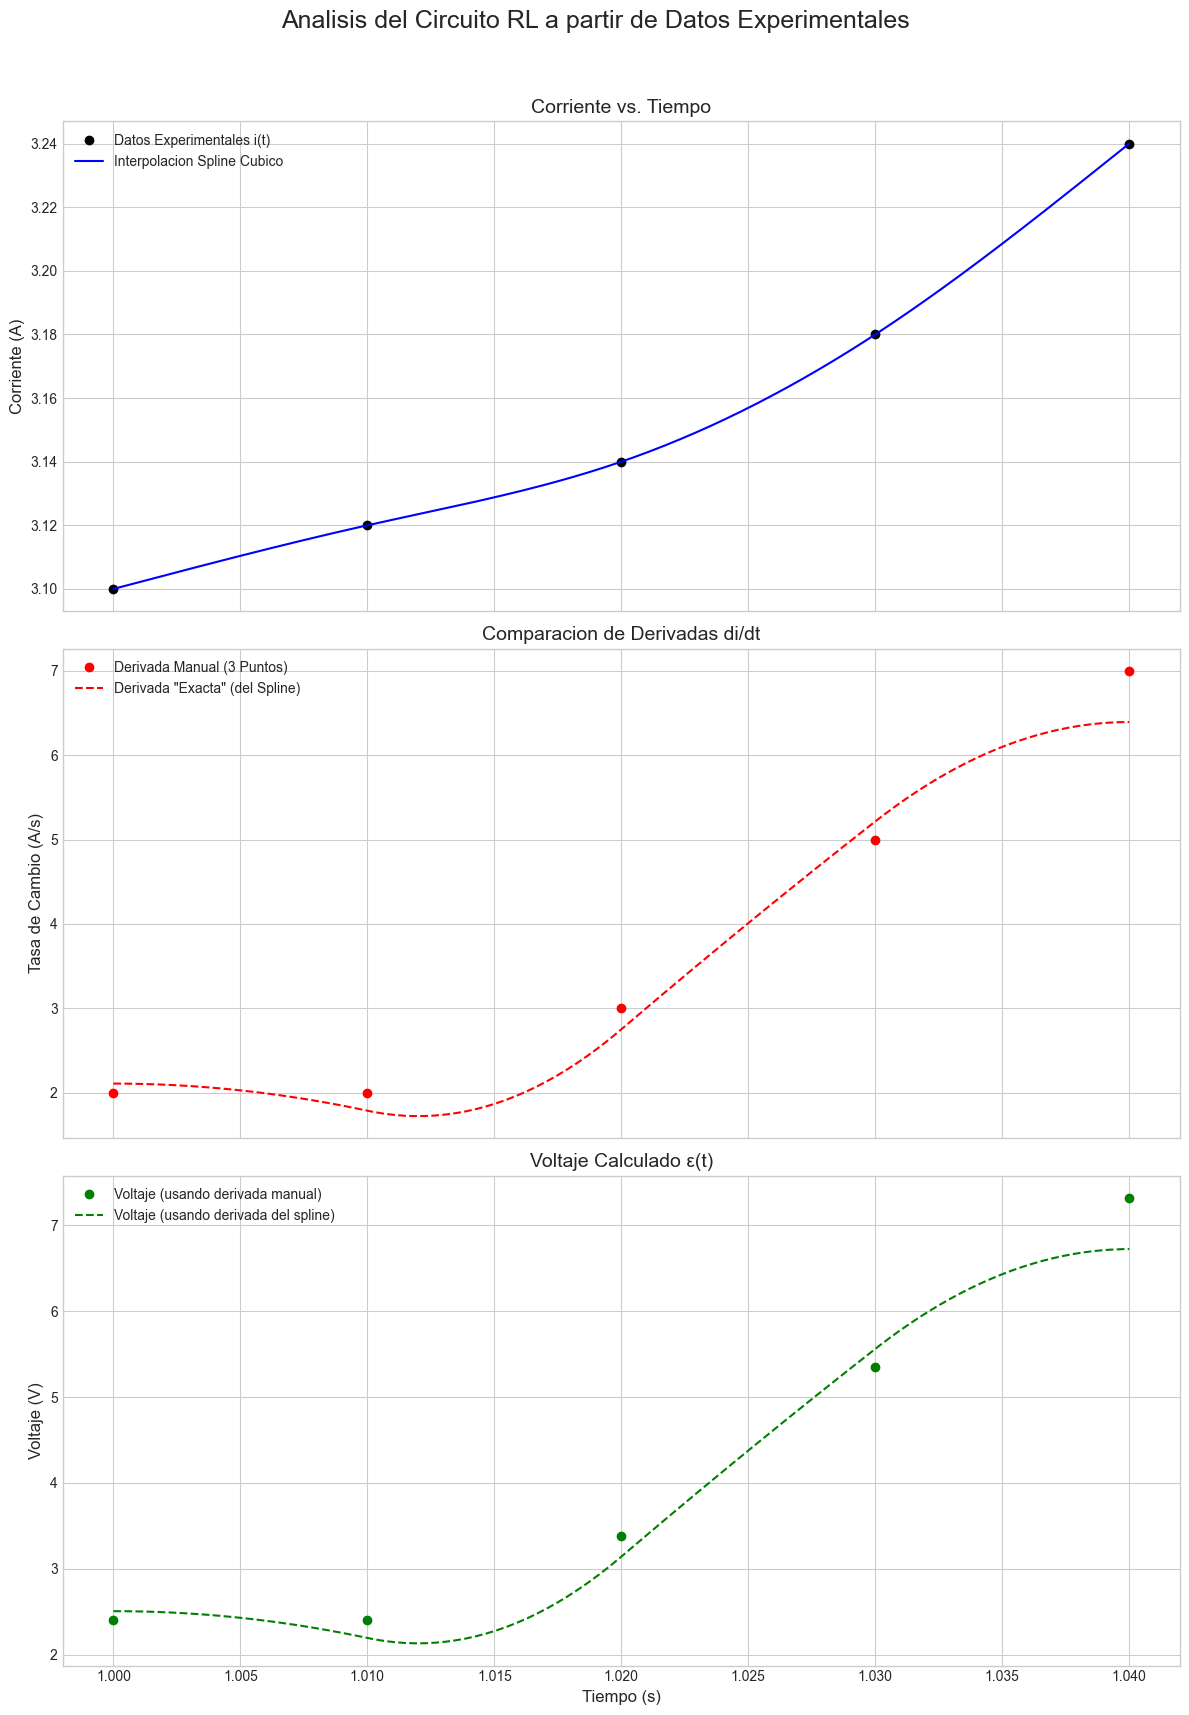

In [7]:
# --- 4. Graficas Comparativas y Analisis Final ---#

# Se crea un rango de tiempo mas denso para graficar las curvas suaves del spline.
tiempos_grafica = np.linspace(tiempos.min(), tiempos.max(), 200)

# Se evaluan la corriente y su derivada en el rango denso.
corriente_grafica = spline_corriente(tiempos_grafica)
di_dt_grafica = derivada_spline(tiempos_grafica)
voltaje_grafica = inductancia_L * di_dt_grafica + resistencia_R * corriente_grafica

# --- Creacion de las Graficas ---#
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
fig.suptitle("Analisis del Circuito RL a partir de Datos Experimentales", fontsize=18)

# Grafica 1: Datos y Modelo de Interpolacion
ax1.plot(tiempos, corrientes, 'o', color='black', label='Datos Experimentales i(t)')
ax1.plot(tiempos_grafica, corriente_grafica, 'b-', label='Interpolacion Spline Cubico')
ax1.set_title("Corriente vs. Tiempo", fontsize=14)
ax1.set_ylabel("Corriente (A)", fontsize=12)
ax1.legend()
ax1.grid(True)

# Grafica 2: Comparacion de Derivadas
ax2.plot(tiempos, di_dt_numerica, 'o', color='red', label='Derivada Manual (3 Puntos)')
ax2.plot(tiempos_grafica, di_dt_grafica, 'r--', label='Derivada "Exacta" (del Spline)')
ax2.set_title("Comparacion de Derivadas di/dt", fontsize=14)
ax2.set_ylabel("Tasa de Cambio (A/s)", fontsize=12)
ax2.legend()
ax2.grid(True)

# Grafica 3: Comparacion de Voltajes
ax3.plot(tiempos, voltaje_numerico, 'o', color='green', label='Voltaje (usando derivada manual)')
ax3.plot(tiempos_grafica, voltaje_grafica, 'g--', label='Voltaje (usando derivada del spline)')
ax3.set_title("Voltaje Calculado ε(t)", fontsize=14)
ax3.set_ylabel("Voltaje (V)", fontsize=12)
ax3.set_xlabel("Tiempo (s)", fontsize=12)
ax3.legend()
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




Velocidades en los puntos originales (m/s): 
[74.36219336 76.27561328 83.17316017 65.22077922 65.64862915 92.67568543]

Velocidad en t=12s: 89.6727 m/s


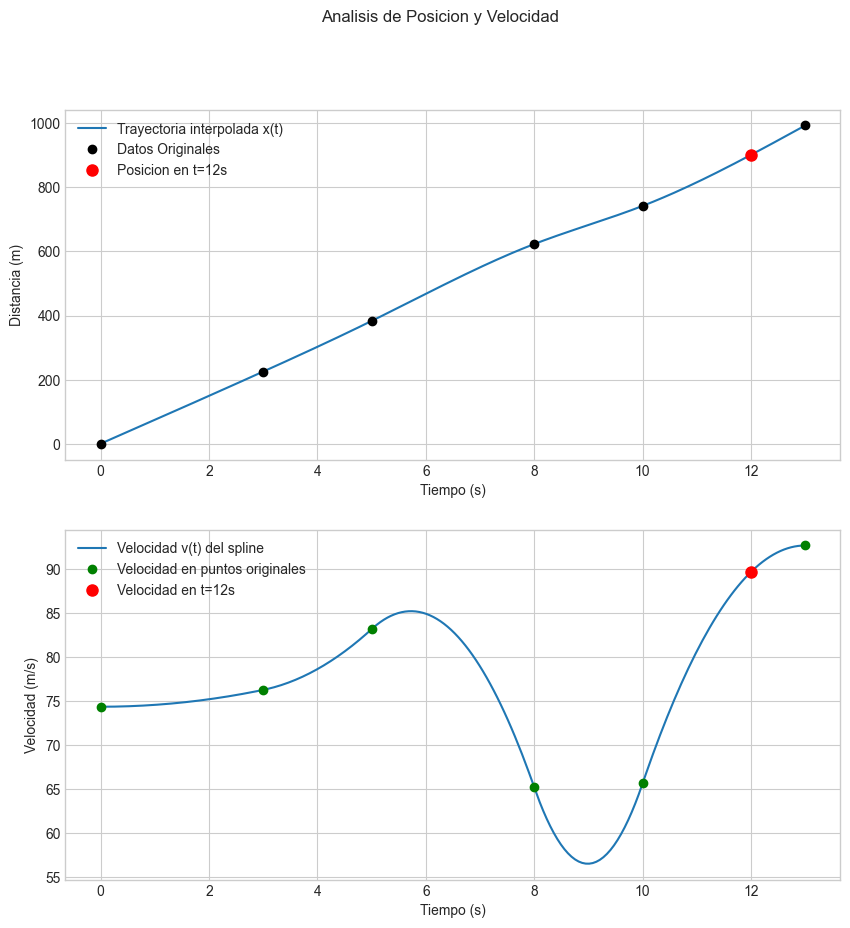

In [9]:
# Se importan las librerias necesarias.
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Datos del problema: tiempo en segundos y distancia en metros.
tiempos = np.array([0, 3, 5, 8, 10, 13])
distancias = np.array([0, 225, 383, 623, 742, 993])

# Se crea una funcion continua de la posicion para poder derivar en cualquier punto.
spline_posicion = CubicSpline(tiempos, distancias, bc_type='natural')

# Se calcula la velocidad usando el metodo nativo del spline para derivar.
# El argumento nu=1 le pide al spline que calcule su primera derivada.
velocidades_puntos = spline_posicion(tiempos, nu=1)
velocidad_en_t12 = spline_posicion(12, nu=1)

# Se presentan los resultados numericos.
print(f"Velocidades en los puntos originales (m/s): \n{velocidades_puntos}")
print(f"\nVelocidad en t=12s: {velocidad_en_t12:.4f} m/s")


# Se preparan los datos para una visualizacion clara.
tiempos_grafica = np.linspace(tiempos.min(), tiempos.max(), 200)
distancias_grafica = spline_posicion(tiempos_grafica)
posicion_en_t12 = spline_posicion(12)

# Se crea una funcion derivada para la grafica (usando el metodo .derivative()).
derivada_spline = spline_posicion.derivative()
velocidades_grafica = derivada_spline(tiempos_grafica)

# Se crean dos subgraficas para posicion y velocidad.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=False) # sharex=False ahora
fig.suptitle("Analisis de Posicion y Velocidad")

# Subgrafica de Posicion vs. Tiempo
ax1.plot(tiempos_grafica, distancias_grafica, label='Trayectoria interpolada x(t)')
ax1.plot(tiempos, distancias, 'o', color='black', label='Datos Originales')
ax1.plot(12, posicion_en_t12, 'ro', markersize=8, label='Posicion en t=12s')
ax1.set_ylabel("Distancia (m)")
ax1.set_xlabel("Tiempo (s)")
ax1.legend()
ax1.grid(True)

# Subgrafica de Velocidad vs. Tiempo
ax2.plot(tiempos_grafica, velocidades_grafica, label='Velocidad v(t) del spline')
ax2.plot(tiempos, velocidades_puntos, 'o', color='green', label='Velocidad en puntos originales')
ax2.plot(12, velocidad_en_t12, 'ro', markersize=8, label='Velocidad en t=12s')
ax2.set_ylabel("Velocidad (m/s)")
ax2.set_xlabel("Tiempo (s)")
ax2.legend()
ax2.grid(True)

plt.show()

# 3.
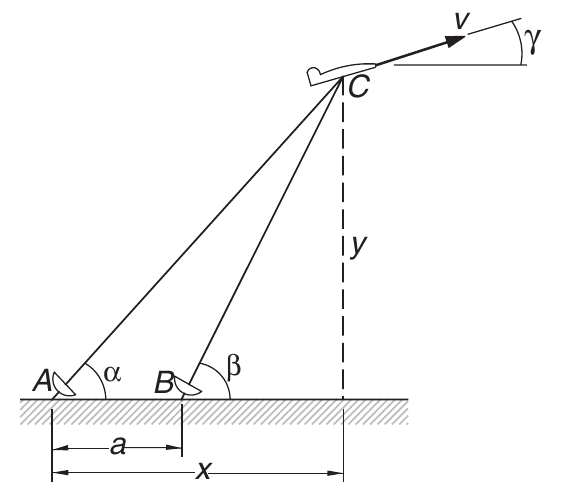


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [14]:
import numpy as np
import pandas as pd

# Datos iniciales del problema.
distancia_a = 500 # Distancia entre estaciones de radar en metros.
datos_radar = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}
# Se crea el DataFrame inicial.
datos_df = pd.DataFrame(datos_radar)

# Se convierten los angulos a radianes para los calculos trigonometricos.
alpha_rad = np.radians(datos_df['alpha (°)'])
beta_rad = np.radians(datos_df['beta (°)'])

# Se calculan las coordenadas (x, y) del avion usando las formulas dadas.
tan_beta = np.tan(beta_rad)
tan_alpha = np.tan(alpha_rad)
denominador = tan_beta - tan_alpha
datos_df['x (m)'] = distancia_a * (tan_beta / denominador)
datos_df['y (m)'] = distancia_a * (tan_alpha * tan_beta / denominador)

# Se usa diferenciacion numerica para encontrar las componentes de la velocidad (Vx, Vy).
velocidad_x = np.gradient(datos_df['x (m)'], datos_df['t (s)'], edge_order=2)
velocidad_y = np.gradient(datos_df['y (m)'], datos_df['t (s)'], edge_order=2)

# Se calcula la magnitud total de la velocidad (rapidez).
datos_df['v (m/s)'] = np.linalg.norm([velocidad_x, velocidad_y], axis=0)

# Se calcula el angulo de ascenso gamma en radianes y se convierte a grados.
angulo_gamma_rad = np.arctan(velocidad_y / velocidad_x)
datos_df['γ (°)'] = np.degrees(angulo_gamma_rad)


# Se muestran los resultados finales en una tabla usando print().
print("--- Tabla de Resultados del Rastreo ---")
print(datos_df)

# Se extrae y presenta la informacion especifica para t = 10s.
resultado_t10 = datos_df[datos_df['t (s)'] == 10]
velocidad_t10 = resultado_t10['v (m/s)'].values[0]
gamma_t10 = resultado_t10['γ (°)'].values[0]

print(f"\nEn t=10s, la velocidad del avion es {velocidad_t10:.4f} m/s "
      f"con un angulo de ascenso γ de {gamma_t10:.4f}°.")

--- Tabla de Resultados del Rastreo ---
   t (s)  alpha (°)  beta (°)        x (m)        y (m)    v (m/s)      γ (°)
0      9      54.80     65.59  1401.918398  1987.346016  50.739091  15.906757
1     10      54.06     64.59  1450.497006  2000.840713  50.099442  15.137988
2     11      53.34     63.62  1498.640350  2013.512411  49.469044  14.349481

En t=10s, la velocidad del avion es 50.0994 m/s con un angulo de ascenso γ de 15.1380°.


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import quad

# Datos de tiempo en segundos y velocidad en m/s.
tiempos = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])
velocidades = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])

# --- Pregunta 1: Distancia Recorrida (Integracion) ---

# Se crea una funcion continua v(t) usando un spline para poder integrarla.
spline_velocidad = CubicSpline(tiempos, velocidades, bc_type='natural')

# Se integra numericamente la funcion de velocidad desde t=0 hasta t=28s.
t_inicial, t_final = 0, 28
distancia_recorrida, error_estimado = quad(spline_velocidad, t_inicial, t_final)


# --- Pregunta 2: Aceleracion Instantanea (Diferenciacion) ---

# Se calcula la derivada dv/dt en todos los puntos usando diferencias finitas.
aceleraciones = np.gradient(velocidades, tiempos, edge_order=2)

# Se busca el indice correspondiente a t=28s para extraer su aceleracion.
indice_t28 = np.where(tiempos == 28)[0][0]
aceleracion_en_t28 = aceleraciones[indice_t28]


# --- Resultados Finales ---
print(f"La distancia recorrida desde t={t_inicial}s hasta t={t_final}s es: {distancia_recorrida:.4f} metros.")
print(f"La aceleracion en t={t_final}s es: {aceleracion_en_t28:.4f} m/s^2.")


La distancia recorrida desde t=0s hasta t=28s es: 2318.8365 metros.
La aceleracion en t=28s es: 1.7250 m/s^2.


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import quad

# Datos proporcionados del lago.
profundidades = np.array([0, 4, 8, 12, 16])
volumenes = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6
concentraciones = np.array([10.2, 8.5, 7.4, 5.2, 4.1])
profundidad_total = profundidades[-1]

# 1. Se calcula el area superficial (As) diferenciando el volumen.
# As(z) = -dV/dz. Se usa np.gradient para obtener los valores en los puntos discretos.
areas_superficiales = -np.gradient(volumenes, profundidades, edge_order=2)

# 2. Se crean funciones continuas a partir de los datos discretos.
# Esto es necesario para poder integrar numericamente con la funcion 'quad'.
spline_area = CubicSpline(profundidades, areas_superficiales)
spline_concentracion = CubicSpline(profundidades, concentraciones)

# 3. Se calcula el volumen total (VT) integrando la funcion de area.
# VT = integral de As(z) dz desde 0 hasta la profundidad total.
z_inicial, z_final = 0, profundidad_total
volumen_total, _ = quad(spline_area, z_inicial, z_final)

# 4. Se calcula la concentracion promedio usando la formula dada.
# Se define el integrando del numerador: c(z) * As(z).
integrando_concentracion = lambda z: spline_concentracion(z) * spline_area(z)
# Se integra el numerador y se divide por el volumen total.
integral_numerador, _ = quad(integrando_concentracion, z_inicial, z_final)
concentracion_promedio = integral_numerador / volumen_total

# Se presenta el resultado final.
print(f"La concentracion promedio de la sustancia en el lago es: {concentracion_promedio:.4f} g/m³.")


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea mejor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [16]:
import numpy as np
import pandas as pd
from scipy.integrate import quad

# Se define el integrando de la probabilidad
integrando_probabilidad = lambda r: r**2 * (2 - r)**2 * np.exp(-r)


def integral_trapecio(f, a, b, n):
    """Calcula la integral de f desde a hasta b usando la regla del trapecio."""
    h = (b - a) / n
    suma = f(a) + f(b)
    for i in range(1, n):
        suma += 2 * f(a + i * h)
    return (h / 2) * suma


def integral_simpson(f, a, b, n):
    """Calcula la integral de f desde a hasta b usando la regla de Simpson 1/3."""
    if n % 2 != 0: # n debe ser par para la regla de Simpson.
        n += 1
    h = (b - a) / n
    suma = f(a) + f(b)
    for i in range(1, n, 2): # Suma de terminos impares
        suma += 4 * f(a + i * h)
    for i in range(2, n, 2): # Suma de terminos pares
        suma += 2 * f(a + i * h)
    return (h / 3) * suma

In [17]:
# --- Calculo de Probabilidades P(R) para R en [10, 25] ---

# Parametros para el calculo.
tolerancia = 1e-6
prefactor = 1.0 / 8.0
valores_R = np.arange(10, 26, 1) # R desde 10 hasta 25
resultados = []

print("Calculando probabilidades P(R)...")

# Bucle principal sobre cada valor de R.
for R_final in valores_R:

    # --- Metodo del Trapecio con tolerancia ---
    n_trap = 100 # Empezamos con un numero razonable de intervalos.
    while True:
        integral_actual = integral_trapecio(integrando_probabilidad, 0, R_final, n_trap)
        integral_mejorada = integral_trapecio(integrando_probabilidad, 0, R_final, 2 * n_trap)
        if np.abs(integral_mejorada - integral_actual) < tolerancia:
            prob_trapecio = prefactor * integral_mejorada
            break
        n_trap *= 2 # Se duplica el numero de intervalos si no hay convergencia.

    # --- Metodo de Simpson con tolerancia ---
    n_simp = 10 # Simpson converge mas rapido, necesita menos intervalos iniciales.
    while True:
        integral_actual = integral_simpson(integrando_probabilidad, 0, R_final, n_simp)
        integral_mejorada = integral_simpson(integrando_probabilidad, 0, R_final, 2 * n_simp)
        if np.abs(integral_mejorada - integral_actual) < tolerancia:
            prob_simpson = prefactor * integral_mejorada
            break
        n_simp *= 2

    # --- Metodo de Cuadratura (SciPy) ---
    # quad maneja el error internamente con el parametro 'epsabs'.
    integral_quad, _ = quad(integrando_probabilidad, 0, R_final, epsabs=tolerancia)
    prob_cuadratura = prefactor * integral_quad

    # Se guardan los resultados de esta iteracion.
    resultados.append([R_final, prob_trapecio, prob_simpson, prob_cuadratura])

print("Calculo completado.")

# Se crea un DataFrame de pandas para mostrar los resultados.
columnas = ["R", "P(R) Trapecio", "P(R) Simpson", "P(R) Cuadratura"]
resultados_df = pd.DataFrame(resultados, columns=columnas)

print("\n--- Tabla de Probabilidades P(R) ---")
display(resultados_df)

Calculando probabilidades P(R)...
Calculo completado.

--- Tabla de Probabilidades P(R) ---


,R,P(R) Trapecio,P(R) Simpson,P(R) Cuadratura
0,10,0.940481,0.940481,0.940481
1,11,0.968223,0.968223,0.968223
2,12,0.983552,0.983552,0.983552
3,13,0.991708,0.991708,0.991708
4,14,0.995913,0.995913,0.995913
5,15,0.998025,0.998025,0.998025
6,16,0.999062,0.999062,0.999062
7,17,0.999561,0.999561,0.999561
8,18,0.999797,0.999797,0.999797
9,19,0.999908,0.999908,0.999908


In [18]:
# --- Verificacion de la Probabilidad Total (R -> infinito) ---

# Se calcula la integral desde 0 hasta infinito.
# np.inf representa el infinito para la funcion quad.
integral_total, _ = quad(integrando_probabilidad, 0, np.inf)
probabilidad_total = prefactor * integral_total

print("\n--- Probabilidad Total ---")
print(f"El valor de la integral desde r=0 hasta infinito es: {probabilidad_total:.8f}")
print("El resultado es 1.0, lo que verifica que la funcion de onda esta normalizada correctamente.")


--- Probabilidad Total ---
El valor de la integral desde r=0 hasta infinito es: 1.00000000
El resultado es 1.0, lo que verifica que la funcion de onda esta normalizada correctamente.


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

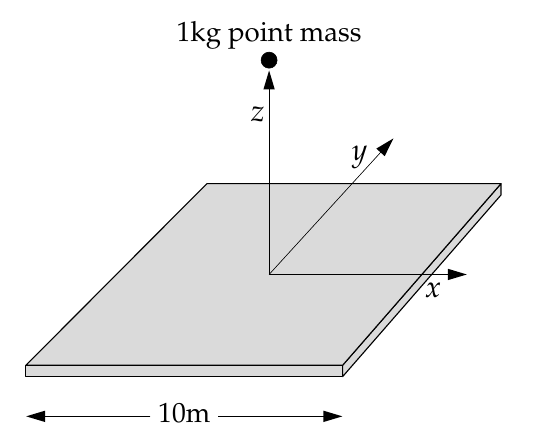

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


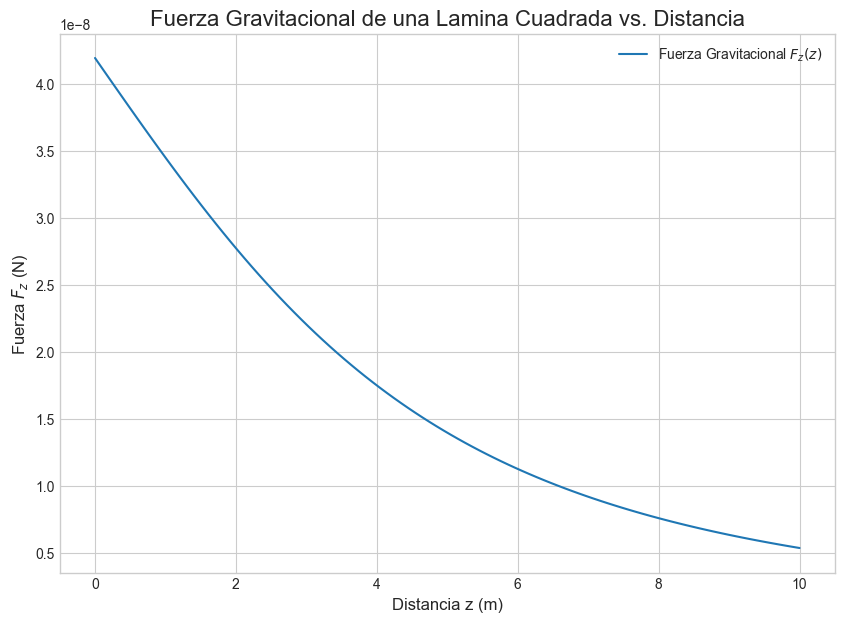

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Se definen las constantes fisicas del problema.
constante_G = 6.674e-11 # Constante de gravitacion universal en m^3 kg^-1 s^-2
masa_M = 10000          # Masa de la lamina en kg
lado_L = 10             # Lado de la lamina en m
densidad_sigma = masa_M / (lado_L**2) # Densidad superficial de masa en kg/m^2

# Se define el integrando de la formula de la fuerza.
# La funcion de scipy espera el orden f(y, x, ...), z es un argumento extra.
integrando_fuerza = lambda y, x, z: 1 / ((x**2 + y**2 + z**2)**(3/2))

# Se crea un arreglo de distancias 'z' para calcular y graficar la fuerza.
# Se inicia en un valor pequeño > 0 para evitar una posible singularidad en z=0.
distancias_z = np.linspace(0.001, 10, 100)
fuerzas_z = np.zeros_like(distancias_z)

# Se itera sobre cada valor de z para calcular la fuerza correspondiente.
for i, z_actual in enumerate(distancias_z):

    # Los limites de integracion para la placa cuadrada van de -L/2 a L/2.
    lim_inferior, lim_superior = -lado_L / 2, lado_L / 2

    # Se calcula la integral doble para el valor actual de z.
    integral, error_estimado = dblquad(
        integrando_fuerza,
        lim_inferior, lim_superior,    # Limites para x
        lim_inferior, lim_superior,    # Limites para y
        args=(z_actual,)               # Se pasa z_actual como argumento extra
    )

    # Se calcula la fuerza total usando la formula completa.
    fuerzas_z[i] = constante_G * densidad_sigma * z_actual * integral

# --- Visualizacion del Resultado ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))
plt.plot(distancias_z, fuerzas_z, label=r'Fuerza Gravitacional $F_z(z)$')
plt.title("Fuerza Gravitacional de una Lamina Cuadrada vs. Distancia", fontsize=16)
plt.xlabel("Distancia z (m)", fontsize=12)
plt.ylabel("Fuerza $F_z$ (N)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()